In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv(r"D:\notes\sem 6\ml lab\pg_9\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
le = LabelEncoder()
df['Species']= le.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [10]:
X=df.iloc[:,:4]
y=df.iloc[:,4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

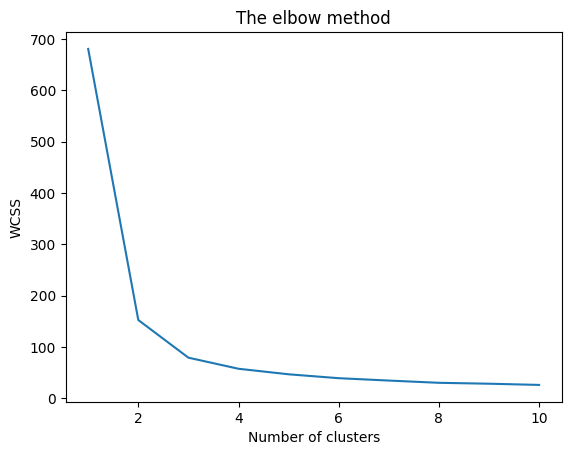

In [20]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans_final = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
kmeans_final.fit(X)
y_prediction=kmeans_final.predict(X_test)

In [24]:
class_names=["Iris-setosa","Iris-virginica","Iris-versicolor"]
print(classification_report(y_test, y_prediction ,target_names=class_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
 Iris-virginica       0.62      1.00      0.77        10
Iris-versicolor       1.00      0.65      0.79        17

       accuracy                           0.87        45
      macro avg       0.88      0.88      0.85        45
   weighted avg       0.92      0.87      0.87        45

